# Preprocessing and Modeling

Ear Images Reference:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232776

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception, InceptionResNetV2, ResNet101
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### DateFrame to Input Results From Models

In [2]:
results_df2 = pd.read_csv('../data/results_df2.csv')

## Import Data 

In [32]:
train_gen = ImageDataGenerator(rescale = 1/255., validation_split= 0.2)

train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/', subset = 'training')

validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/', subset = 'validation')

Found 295 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [52]:
#valid_gen = ImageDataGenerator(rescale = 1/255.)
#validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/valid/')

Found 71 images belonging to 3 classes.


In [33]:
test_gen = ImageDataGenerator(rescale = 1/255.)
test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', shuffle = False)

Found 90 images belonging to 5 classes.


## Basic Model

In [36]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [37]:
history = model.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 5s 489ms/step - loss: 53.9918 - accuracy: 0.2339 - recall: 0.2102 - precision: 0.2357 - val_loss: 19.9422 - val_accuracy: 0.2571 - val_recall: 0.2571 - val_precision: 0.2571
Epoch 2/80
10/10 [==============================] - 4s 417ms/step - loss: 22.7333 - accuracy: 0.4746 - recall: 0.4712 - precision: 0.4777 - val_loss: 5.7554 - val_accuracy: 0.5857 - val_recall: 0.5714 - val_precision: 0.6061
Epoch 3/80
10/10 [==============================] - 4s 446ms/step - loss: 7.8822 - accuracy: 0.4407 - recall: 0.4339 - precision: 0.4399 - val_loss: 9.5841 - val_accuracy: 0.5286 - val_recall: 0.5286 - val_precision: 0.5286
Epoch 4/80
10/10 [==============================] - 4s 430ms/step - loss: 7.5204 - accuracy: 0.4814 - recall: 0.4814 - precision: 0.4830 - val_loss: 5.8284 - val_accuracy: 0.6000 - val_recall: 0.5857 - val_precision: 0.5942
Epoch 5/80
10/10 [==============================] - 4s 453ms/step - loss: 7.2515 - accuracy: 0.4983 -

#### Adding Results to DF

In [43]:
results_df2['train_accuracy'].iloc[0] = 0

In [44]:
results_df2['val_accuracy'].iloc[0] = 0

In [45]:
results_df2['train_precision'].iloc[0] = 0

In [46]:
results_df2['val_precision'].iloc[0] = 0

In [236]:
results_df2['train_recall'].iloc[0] = 0

In [237]:
results_df2['val_recall'].iloc[0] = 0

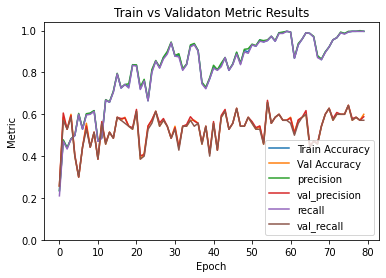

In [47]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validaton Metric Results');

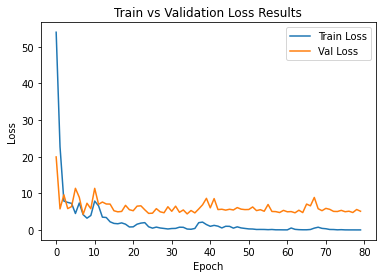

In [48]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [15]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [49]:
model.evaluate(test_data)

preds = model.predict(test_data) > 0.5

preds = preds.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds.argmax(axis=1))


3/3 [==============================] - 1s 305ms/step - loss: 8.5938 - accuracy: 0.4667 - recall: 0.4667 - precision: 0.4719


#### Adding Results to DF

In [238]:
results_df['test_recall'].iloc[0] = 0.

In [239]:
results_df['test_accuracy'].iloc[0] = 0

In [240]:
results_df['test_precision'].iloc[0] =  0

#### Confusion Matrix

In [50]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             2       3             2     0        1
normal               2      19             2     9        2
otitis_media         0       1             7     3        5
tube                 0       5             0    13        1
unclear              0       8             1     3        1


#### Classification Report 

In [52]:
print(classification_report(test_data_values, preds.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.50      0.25      0.33         8
      normal       0.53      0.56      0.54        34
otitis_media       0.58      0.44      0.50        16
        tube       0.46      0.68      0.55        19
     unclear       0.10      0.08      0.09        13

    accuracy                           0.47        90
   macro avg       0.44      0.40      0.40        90
weighted avg       0.46      0.47      0.45        90



## Model 1: Adding Epochs

In [53]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(5, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [54]:
history1 = model1.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
10/10 [==============================] - 6s 560ms/step - loss: 62.4394 - accuracy: 0.2271 - recall: 0.2169 - precision: 0.2222 - val_loss: 23.3768 - val_accuracy: 0.3857 - val_recall: 0.3857 - val_precision: 0.3857
Epoch 2/100
10/10 [==============================] - 4s 439ms/step - loss: 24.9574 - accuracy: 0.3356 - recall: 0.3356 - precision: 0.3356 - val_loss: 14.8194 - val_accuracy: 0.2857 - val_recall: 0.2857 - val_precision: 0.2857
Epoch 3/100
10/10 [==============================] - 4s 451ms/step - loss: 12.4910 - accuracy: 0.3593 - recall: 0.3593 - precision: 0.3630 - val_loss: 6.0747 - val_accuracy: 0.4429 - val_recall: 0.4286 - val_precision: 0.4348
Epoch 4/100
10/10 [==============================] - 5s 470ms/step - loss: 5.5108 - accuracy: 0.4847 - recall: 0.4847 - precision: 0.4897 - val_loss: 3.0179 - val_accuracy: 0.4286 - val_recall: 0.4286 - val_precision: 0.4762
Epoch 5/100
10/10 [==============================] - 4s 428ms/step - loss: 2.7905 - accuracy: 0

#### Adding Results to DF

In [60]:
results_df2['train_accuracy'].iloc[1] = 0

In [61]:
results_df2['val_accuracy'].iloc[1] = 0

In [62]:
results_df2['train_recall'].iloc[1] = 0

In [63]:
results_df2['val_recall'].iloc[1] = 0

In [64]:
results_df2['train_precision'].iloc[1] = 0

In [65]:
results_df2['val_precision'].iloc[1] = 0

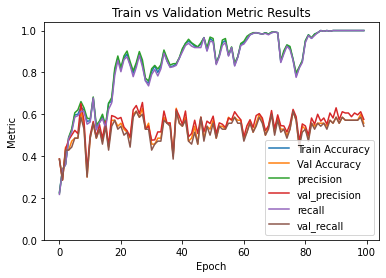

In [66]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['val_precision'], label = 'val_precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.plot(history1.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

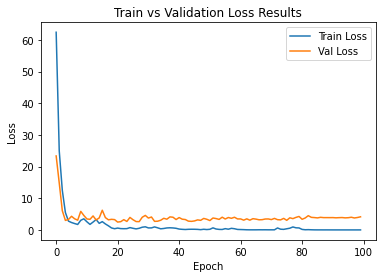

In [67]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [68]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [69]:
model1.evaluate(test_data)

preds1 = model1.predict(test_data) > 0.5

preds1 = preds1.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds1.argmax(axis=1))

3/3 [==============================] - 1s 346ms/step - loss: 6.3685 - accuracy: 0.4667 - recall: 0.4444 - precision: 0.4545


array([[ 2,  3,  2,  1,  0],
       [ 2, 20,  1, 10,  1],
       [ 0,  3,  4,  6,  3],
       [ 0,  5,  1, 13,  0],
       [ 1,  8,  1,  2,  1]])

#### Adding Test Data to DF

In [71]:
results_df2['test_accuracy'].iloc[1] = 0

In [72]:
results_df2['test_recall'].iloc[1] = 0

In [73]:
results_df2['test_precision'].iloc[1] = 0

#### Confusion Matrix

In [74]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             2       3             2     1        0
normal               2      20             1    10        1
otitis_media         0       3             4     6        3
tube                 0       5             1    13        0
unclear              1       8             1     2        1


#### Classifcation Report 

In [75]:
print(classification_report(test_data_values, preds1.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.40      0.25      0.31         8
      normal       0.51      0.59      0.55        34
otitis_media       0.44      0.25      0.32        16
        tube       0.41      0.68      0.51        19
     unclear       0.20      0.08      0.11        13

    accuracy                           0.44        90
   macro avg       0.39      0.37      0.36        90
weighted avg       0.42      0.44      0.41        90



## Model 2: Adding Layers 

In [76]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(5, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [77]:
history2 = model2.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 486ms/step - loss: 26.4632 - accuracy: 0.2271 - recall: 0.2136 - precision: 0.2405 - val_loss: 18.8523 - val_accuracy: 0.3857 - val_recall: 0.3857 - val_precision: 0.3857
Epoch 2/100
10/10 [==============================] - 4s 440ms/step - loss: 17.0208 - accuracy: 0.3119 - recall: 0.3051 - precision: 0.3072 - val_loss: 11.3393 - val_accuracy: 0.3857 - val_recall: 0.3857 - val_precision: 0.3857
Epoch 3/100
10/10 [==============================] - 5s 477ms/step - loss: 7.3490 - accuracy: 0.3390 - recall: 0.3288 - precision: 0.3404 - val_loss: 4.6210 - val_accuracy: 0.3286 - val_recall: 0.3000 - val_precision: 0.3500
Epoch 4/100
10/10 [==============================] - 4s 454ms/step - loss: 4.2355 - accuracy: 0.3797 - recall: 0.3492 - precision: 0.3732 - val_loss: 4.3093 - val_accuracy: 0.4571 - val_recall: 0.4571 - val_precision: 0.4571
Epoch 5/100
10/10 [==============================] - 5s 454ms/step - loss: 2.8817 - accuracy: 0.

#### Adding Results to DF

In [80]:
results_df2['train_accuracy'].iloc[2] = 0

In [81]:
results_df2['train_recall'].iloc[2] = 0

In [82]:
results_df2['train_precision'].iloc[2] = 0

In [83]:
results_df2['val_accuracy'].iloc[2] = 0

In [84]:
results_df2['val_recall'].iloc[2] = 0

In [85]:
results_df2['val_precision'].iloc[2] = 0

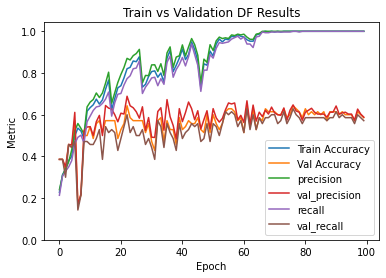

In [86]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['val_precision'], label = 'val_precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.plot(history2.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation DF Results');

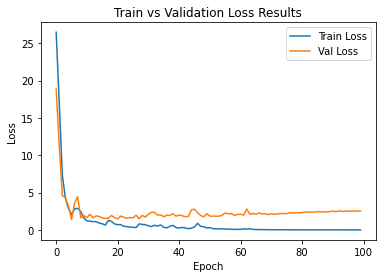

In [87]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [88]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [89]:
model2.evaluate(test_data)

preds2 = model2.predict(test_data) > 0.5

preds2 = preds2.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds2.argmax(axis=1))

3/3 [==============================] - 1s 356ms/step - loss: 4.0898 - accuracy: 0.4778 - recall: 0.4778 - precision: 0.4886


#### Adding Results to DF

In [90]:
results_df2['test_accuracy'].iloc[2] =  0

In [91]:
results_df2['test_precision'].iloc[2] =  0

In [92]:
results_df2['test_recall'].iloc[2] =  0

#### Confusion Matrix

In [93]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             2       2             1     0        3
normal               2      19             1     9        3
otitis_media         0       1             7     4        4
tube                 0       5             0    13        1
unclear              2       6             0     3        2


#### Classification Report 

In [94]:
print(classification_report(test_data_values, preds2.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.33      0.25      0.29         8
      normal       0.58      0.56      0.57        34
otitis_media       0.78      0.44      0.56        16
        tube       0.45      0.68      0.54        19
     unclear       0.15      0.15      0.15        13

    accuracy                           0.48        90
   macro avg       0.46      0.42      0.42        90
weighted avg       0.50      0.48      0.48        90



## Model 3: Changing Layers and Using Early Stopping 

In [95]:
early_stop = EarlyStopping(patience = 5)

In [96]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(5, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [97]:
history3 = model3.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
10/10 [==============================] - 6s 522ms/step - loss: 41.4674 - accuracy: 0.2678 - recall: 0.2441 - precision: 0.2738 - val_loss: 23.5109 - val_accuracy: 0.1714 - val_recall: 0.1714 - val_precision: 0.1714
Epoch 2/80
10/10 [==============================] - 4s 454ms/step - loss: 14.5383 - accuracy: 0.2915 - recall: 0.2881 - precision: 0.2911 - val_loss: 10.3405 - val_accuracy: 0.4000 - val_recall: 0.3857 - val_precision: 0.3913
Epoch 3/80
10/10 [==============================] - 4s 414ms/step - loss: 6.7801 - accuracy: 0.3932 - recall: 0.3932 - precision: 0.4014 - val_loss: 7.0408 - val_accuracy: 0.3429 - val_recall: 0.3429 - val_precision: 0.3636
Epoch 4/80
10/10 [==============================] - 5s 466ms/step - loss: 5.8754 - accuracy: 0.3763 - recall: 0.3729 - precision: 0.3754 - val_loss: 5.6595 - val_accuracy: 0.2571 - val_recall: 0.2429 - val_precision: 0.2500
Epoch 5/80
10/10 [==============================] - 5s 473ms/step - loss: 4.7682 - accuracy: 0.4542 

#### Adding Results to DF

In [98]:
results_df2['train_accuracy'].iloc[3] = 0

In [99]:
results_df2['train_recall'].iloc[3] = 0

In [100]:
results_df2['train_precision'].iloc[3] = 0

In [101]:
results_df2['val_accuracy'].iloc[3] = 0

In [102]:
results_df2['val_recall'].iloc[3] = 0

In [103]:
results_df2['val_precision'].iloc[3] = 0

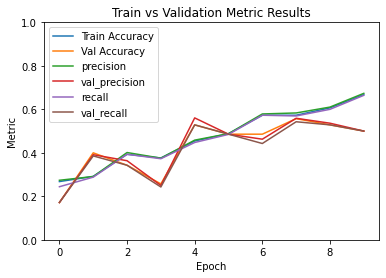

In [104]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['val_precision'], label = 'val_precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.plot(history3.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


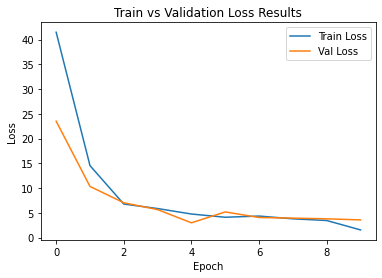

In [105]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [106]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [107]:
model3.evaluate(test_data)

preds3 = model3.predict(test_data) > 0.5

preds3 = preds3.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds3.argmax(axis=1))

3/3 [==============================] - 1s 347ms/step - loss: 6.4974 - accuracy: 0.3222 - recall: 0.3222 - precision: 0.3222


#### Adding Results to DF

In [108]:
results_df2['test_precision'].iloc[3] =  0

In [109]:
results_df2['test_recall'].iloc[3] = 0.

In [110]:
results_df2['test_accuracy'].iloc[3] = 0

#### Confusion Matrix

In [111]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             1       2             2     3        0
normal               0       9             2    21        2
otitis_media         0       0             0    13        3
tube                 0       1             0    17        1
unclear              0       3             0     8        2


#### Classification Report 

In [112]:
print(classification_report(test_data_values, preds3.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#precision:TP/(TP+FP)
#recall:TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       1.00      0.12      0.22         8
      normal       0.60      0.26      0.37        34
otitis_media       0.00      0.00      0.00        16
        tube       0.27      0.89      0.42        19
     unclear       0.25      0.15      0.19        13

    accuracy                           0.32        90
   macro avg       0.42      0.29      0.24        90
weighted avg       0.41      0.32      0.27        90



## Model 4: Changing Layers and Dropout

In [113]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(5, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [114]:
history4 = model4.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 527ms/step - loss: 58.5325 - accuracy: 0.2441 - recall: 0.2339 - precision: 0.2624 - val_loss: 28.3276 - val_accuracy: 0.1714 - val_recall: 0.1714 - val_precision: 0.1714
Epoch 2/80
10/10 [==============================] - 5s 458ms/step - loss: 23.4342 - accuracy: 0.2644 - recall: 0.2644 - precision: 0.2644 - val_loss: 14.9940 - val_accuracy: 0.1714 - val_recall: 0.1714 - val_precision: 0.1714
Epoch 3/80
10/10 [==============================] - 5s 503ms/step - loss: 13.2146 - accuracy: 0.3356 - recall: 0.3288 - precision: 0.3345 - val_loss: 4.7769 - val_accuracy: 0.3714 - val_recall: 0.3714 - val_precision: 0.3714
Epoch 4/80
10/10 [==============================] - 5s 478ms/step - loss: 6.9116 - accuracy: 0.3729 - recall: 0.3627 - precision: 0.3702 - val_loss: 2.4040 - val_accuracy: 0.4714 - val_recall: 0.4429 - val_precision: 0.5345
Epoch 5/80
10/10 [==============================] - 5s 454ms/step - loss: 6.2440 - accuracy: 0.4678

#### Adding Results to DF

In [115]:
results_df2['train_accuracy'].iloc[4] = 0

In [116]:
results_df2['train_recall'].iloc[4] = 0

In [117]:
results_df2['train_precision'].iloc[4] = 0

In [118]:
results_df2['val_accuracy'].iloc[4] =0

In [119]:
results_df2['val_recall'].iloc[4] = 0

In [120]:
results_df2['val_precision'].iloc[4] = 0

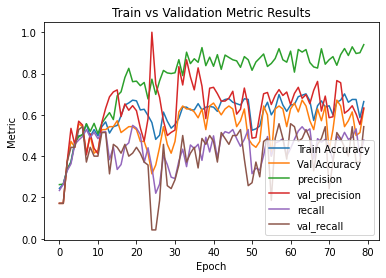

In [121]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history4.history['precision'], label = 'precision')
plt.plot(history4.history['val_precision'], label = 'val_precision')
plt.plot(history4.history['recall'], label = 'recall')
plt.plot(history4.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');



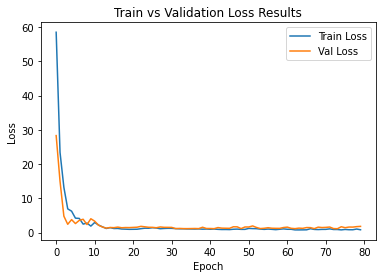

In [122]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [123]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [124]:
model4.evaluate(test_data)

preds4 = model4.predict(test_data) > 0.5

preds4 = preds4.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds4.argmax(axis=1))

3/3 [==============================] - 1s 302ms/step - loss: 3.4114 - accuracy: 0.4556 - recall: 0.4000 - precision: 0.4800


#### Adding Results to DF

In [125]:
results_df2['test_accuracy'].iloc[4] = 0

In [126]:
results_df2['test_recall'].iloc[4] = 0

In [127]:
results_df2['test_precision'].iloc[4] = 0

#### Confusion Matrix 

In [128]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             3       3             0     2        0
normal               5      20             0     9        0
otitis_media         4       2             0    10        0
tube                 1       2             0    16        0
unclear              2       7             0     4        0


#### Classification Report 

In [129]:
print(classification_report(test_data_values, preds4.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.20      0.38      0.26         8
      normal       0.59      0.59      0.59        34
otitis_media       0.00      0.00      0.00        16
        tube       0.39      0.84      0.53        19
     unclear       0.00      0.00      0.00        13

    accuracy                           0.43        90
   macro avg       0.24      0.36      0.28        90
weighted avg       0.32      0.43      0.36        90



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 5: Kernal Regularizer with Dropout

In [130]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(5, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [131]:
history5 = model5.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 512ms/step - loss: 48.9860 - accuracy: 0.2237 - recall: 0.2203 - precision: 0.2330 - val_loss: 12.9764 - val_accuracy: 0.3857 - val_recall: 0.3857 - val_precision: 0.3857
Epoch 2/80
10/10 [==============================] - 4s 427ms/step - loss: 20.9632 - accuracy: 0.2949 - recall: 0.2949 - precision: 0.2949 - val_loss: 3.0510 - val_accuracy: 0.4143 - val_recall: 0.3714 - val_precision: 0.4127
Epoch 3/80
10/10 [==============================] - 4s 454ms/step - loss: 14.0694 - accuracy: 0.2610 - recall: 0.2542 - precision: 0.2586 - val_loss: 3.7487 - val_accuracy: 0.3286 - val_recall: 0.3143 - val_precision: 0.3492
Epoch 4/80
10/10 [==============================] - 4s 455ms/step - loss: 8.3741 - accuracy: 0.3932 - recall: 0.3898 - precision: 0.3993 - val_loss: 2.3875 - val_accuracy: 0.2571 - val_recall: 0.2286 - val_precision: 0.2712
Epoch 5/80
10/10 [==============================] - 4s 430ms/step - loss: 5.0832 - accuracy: 0.3458 

#### Adding Results to DF

In [132]:
results_df2['train_accuracy'].iloc[5] = 0

In [133]:
results_df2['train_recall'].iloc[5] = 0

In [134]:
results_df2['train_precision'].iloc[5] = 0

In [135]:
results_df2['val_accuracy'].iloc[5] = 0

In [136]:
results_df2['val_recall'].iloc[5] = 0

In [137]:
results_df2['val_precision'].iloc[5] = 0

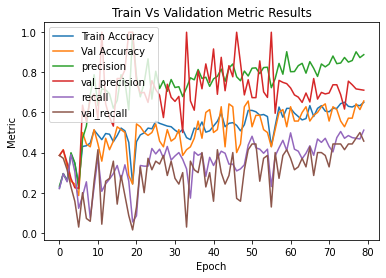

In [138]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history5.history['precision'], label = 'precision')
plt.plot(history5.history['val_precision'], label = 'val_precision')
plt.plot(history5.history['recall'], label = 'recall')
plt.plot(history5.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train Vs Validation Metric Results');

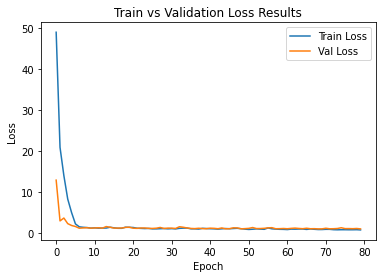

In [139]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [140]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [141]:
model5.evaluate(test_data)

preds5 = model5.predict(test_data) > 0.5

preds5 = preds5.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds5.argmax(axis=1))

3/3 [==============================] - 1s 293ms/step - loss: 1.7146 - accuracy: 0.4333 - recall: 0.3333 - precision: 0.6122


#### Adding Results to DF

In [142]:
results_df2['test_accuracy'].iloc[5] = 0

In [143]:
results_df2['test_recall'].iloc[5] = 0

In [144]:
results_df2['test_precision'].iloc[5]  =  0

#### Confusion Matrix

In [145]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             6       2             0     0        0
normal              10      19             0     5        0
otitis_media        10       1             1     4        0
tube                 8       1             0    10        0
unclear              7       6             0     0        0


#### Classification Report 

In [146]:
print(classification_report(test_data_values, preds5.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.15      0.75      0.24         8
      normal       0.66      0.56      0.60        34
otitis_media       1.00      0.06      0.12        16
        tube       0.53      0.53      0.53        19
     unclear       0.00      0.00      0.00        13

    accuracy                           0.40        90
   macro avg       0.47      0.38      0.30        90
weighted avg       0.55      0.40      0.38        90



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 6: Adding Convolutional Operation

In [147]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(5, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


In [148]:
history6 = model6.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 8s 728ms/step - loss: 44.4657 - accuracy: 0.2475 - recall: 0.2407 - precision: 0.2710 - val_loss: 26.1506 - val_accuracy: 0.2143 - val_recall: 0.2143 - val_precision: 0.2143
Epoch 2/80
10/10 [==============================] - 7s 657ms/step - loss: 18.1654 - accuracy: 0.3220 - recall: 0.3153 - precision: 0.3174 - val_loss: 3.6591 - val_accuracy: 0.3857 - val_recall: 0.3429 - val_precision: 0.4000
Epoch 3/80
10/10 [==============================] - 7s 666ms/step - loss: 6.0110 - accuracy: 0.3593 - recall: 0.3525 - precision: 0.3649 - val_loss: 2.5005 - val_accuracy: 0.2857 - val_recall: 0.2571 - val_precision: 0.2903
Epoch 4/80
10/10 [==============================] - 7s 666ms/step - loss: 3.3125 - accuracy: 0.4068 - recall: 0.3729 - precision: 0.4167 - val_loss: 1.5589 - val_accuracy: 0.5143 - val_recall: 0.5000 - val_precision: 0.5932
Epoch 5/80
10/10 [==============================] - 7s 672ms/step - loss: 1.5591 - accuracy: 0.5186 -

#### Adding Results to DF

In [149]:
results_df2['train_accuracy'].iloc[6] = 0

results_df2['train_precision'].iloc[6] = 0

results_df2['train_recall'].iloc[6] = 0

results_df2['val_accuracy'].iloc[6] = 0

results_df2['val_precision'].iloc[6] =0

results_df2['val_recall'].iloc[6] = 0

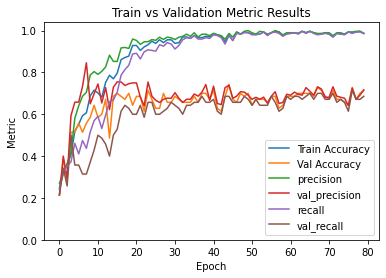

In [150]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history6.history['precision'], label = 'precision')
plt.plot(history6.history['val_precision'], label = 'val_precision')
plt.plot(history6.history['recall'], label = 'recall')
plt.plot(history6.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

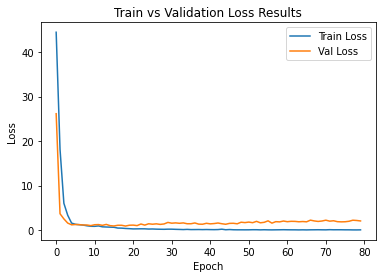

In [151]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [152]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [153]:
model6.evaluate(test_data)

preds6 = model6.predict(test_data) > 0.5

preds6 = preds6.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds6.argmax(axis=1))

3/3 [==============================] - 1s 320ms/step - loss: 2.6727 - accuracy: 0.5667 - recall: 0.5556 - precision: 0.5747


#### Adding Results to DF

In [154]:
results_df2['test_accuracy'].iloc[6] = 0

results_df2['test_precision'].iloc[6] = 0

results_df2['test_recall'].iloc[6] = 0

#### Confusion Matrix

In [155]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube  unclear
effusion             2       1             5     0        0
normal               3      20             5     6        0
otitis_media         0       1            11     1        3
tube                 1       1             1    16        0
unclear              3       4             2     3        1


#### Classification Report 

In [156]:
print(classification_report(test_data_values, preds6.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.22      0.25      0.24         8
      normal       0.74      0.59      0.66        34
otitis_media       0.46      0.69      0.55        16
        tube       0.62      0.84      0.71        19
     unclear       0.25      0.08      0.12        13

    accuracy                           0.56        90
   macro avg       0.46      0.49      0.45        90
weighted avg       0.55      0.56      0.53        90



## Model 7: Convolutional Operation and Max Pooling

In [157]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.1))
model7.add(Dense(5, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [158]:
history7 = model7.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
10/10 [==============================] - 7s 606ms/step - loss: 23.9189 - accuracy: 0.2339 - recall: 0.2102 - precision: 0.2385 - val_loss: 6.2265 - val_accuracy: 0.3857 - val_recall: 0.3857 - val_precision: 0.3913
Epoch 2/80
10/10 [==============================] - 5s 494ms/step - loss: 3.8188 - accuracy: 0.4102 - recall: 0.3559 - precision: 0.4134 - val_loss: 1.5673 - val_accuracy: 0.4143 - val_recall: 0.3571 - val_precision: 0.6098
Epoch 3/80
10/10 [==============================] - 5s 496ms/step - loss: 1.4981 - accuracy: 0.5186 - recall: 0.4169 - precision: 0.5325 - val_loss: 1.3245 - val_accuracy: 0.5857 - val_recall: 0.3429 - val_precision: 0.6486
Epoch 4/80
10/10 [==============================] - 5s 520ms/step - loss: 1.0967 - accuracy: 0.6305 - recall: 0.3864 - precision: 0.8028 - val_loss: 1.2714 - val_accuracy: 0.5286 - val_recall: 0.1857 - val_precision: 0.6500
Epoch 5/80
10/10 [==============================] - 5s 529ms/step - loss: 1.0016 - accuracy: 0.6576 - r

KeyboardInterrupt: 

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[7] = 0

results_df2['train_precision'].iloc[7] = 0

results_df2['train_recall'].iloc[7] = 0

results_df2['val_accuracy'].iloc[7] = 0

results_df2['val_precision'].iloc[7] = 0

results_df2['val_recall'].iloc[7] = 0

In [ ]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history7.history['precision'], label = 'precision')
plt.plot(history7.history['val_precision'], label = 'val_precision')
plt.plot(history7.history['recall'], label = 'recall')
plt.plot(history7.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
model7.evaluate(test_data)

preds7 = model7.predict(test_data) > 0.5

preds7 = preds7.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds7.argmax(axis=1))

#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[7] = 0

results_df2['test_precision'].iloc[7] = 0

results_df2['test_recall'].iloc[7] = 0

#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds7.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 8: Adding Prebuilt Networks InceptionV3

In [ ]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.2)

In [ ]:
test_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [ ]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/', subset = 'training')

valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/', subset = 'validation')

In [ ]:
test_data_aug = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', shuffle = False)

In [ ]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [ ]:
preds = conv_base.predict(train_aug)

In [ ]:
preds_val = conv_base.predict(valid_aug)

In [ ]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.1))
model8.add(Dense(5, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [ ]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_val, y_valid_binarized),
    batch_size = 32)

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[8] = 0

results_df2['train_recall'].iloc[8] = 0

results_df2['train_precision'].iloc[8] = 0

results_df2['val_accuracy'].iloc[8] = 0

results_df2['val_recall'].iloc[8] =  0

results_df2['val_precision'].iloc[8] = 0


In [ ]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history8.history['precision'], label = 'precision')
plt.plot(history8.history['val_precision'], label = 'val_precision')
plt.plot(history8.history['recall'], label = 'recall')
plt.plot(history8.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
test_preds = conv_base.predict(test_data_aug)

In [ ]:
model8.evaluate(test_preds)

preds8 = model8.predict(test_preds) > 0.5

preds8 = preds8.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds8.argmax(axis=1))

#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[8] = 0

results_df2['test_recall'].iloc[8] = 0

results_df2['test_precision'].iloc[8] = 0

#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


#### Classification Matrix 

In [ ]:
print(classification_report(test_data_values, preds8.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 9: Adding Prebuilt Networks Xception

In [ ]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [ ]:
preds9 = conv_base9.predict(train_aug)

In [ ]:
preds_val9 = conv_base9.predict(valid_aug)

In [ ]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.1))
model9.add(Dense(5, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [ ]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_val9, y_valid_binarized),
    batch_size = 32)

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[9] = 0

results_df2['train_recall'].iloc[9] =  0

results_df2['train_precision'].iloc[9] =  0

results_df2['val_accuracy'].iloc[9] = 0 

results_df2['val_recall'].iloc[9] = 0

results_df2['val_precision'].iloc[9] = 0  

In [ ]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history9.history['precision'], label = 'precision')
plt.plot(history9.history['val_precision'], label = 'val_precision')
plt.plot(history9.history['recall'], label = 'recall')
plt.plot(history9.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
preds9_test = conv_base9.predict(test_data_aug)
model9.evaluate(preds9_test)

preds9 = model9.predict(preds9_test) > 0.5

preds9 = preds9.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds9.argmax(axis=1))

#### Adding Results to DF

In [ ]:

results_df2['test_accuracy'].iloc[9] = 0

results_df2['test_recall'].iloc[9] = 0

results_df2['test_precision'].iloc[9] = 0


#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index =['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report

In [ ]:
print(classification_report(test_data_values, preds9.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 10: Adding Prebuilt Networks VGG16

In [ ]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [ ]:
preds10 = conv_base10.predict(train_aug)

In [ ]:
preds_val10 = conv_base10.predict(valid_aug)

In [ ]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.1))
model10.add(Dense(5, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'])

In [ ]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [ ]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 100, validation_data = (preds_val10, y_valid_binarized),
    batch_size = 30)

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[10] = 0

results_df2['train_recall'].iloc[10] = 0

results_df2['train_precision'].iloc[10] = 0

results_df2['val_accuracy'].iloc[10] = 0

results_df2['val_recall'].iloc[10] = 0

results_df2['val_precision'].iloc[10] = 0


In [ ]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history10.history['precision'], label = 'precision')
plt.plot(history10.history['val_precision'], label = 'val_precision')
plt.plot(history10.history['recall'], label = 'recall')
plt.plot(history10.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
preds10_test = conv_base10.predict(test_data_aug)

In [ ]:
model10.evaluate(preds10_test)

preds10 = model10.predict(preds10_test) > 0.5

preds10 = preds10.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds10.argmax(axis=1))

#### Adding Result to DF

In [ ]:
results_df2['test_accuracy'].iloc[10] = 0 

results_df2['test_recall'].iloc[10] = 0

results_df2['test_precision'].iloc[10] = 0


#### Confusion Matrix 

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds10.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 11: Adding Prebuilt Networks MobileNetV2

In [ ]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

preds11 = conv_base11.predict(train_aug)

preds_val11 = conv_base11.predict(valid_aug)

model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.1))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(5, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

history11 = model11.fit(preds11, y_train_binarized, epochs = 100, validation_data = (preds_val11, y_valid_binarized),
    batch_size = 30)



#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[11] = 0

results_df2['train_recall'].iloc[11] = 0

results_df2['train_precision'].iloc[11] = 0

results_df2['val_accuracy'].iloc[11] = 0

results_df2['val_recall'].iloc[11] = 0

results_df2['val_precision'].iloc[11] =  0

In [ ]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history11.history['precision'], label = 'precision')
plt.plot(history11.history['val_precision'], label = 'val_precision')
plt.plot(history11.history['recall'], label = 'recall')
plt.plot(history11.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
preds11_test = conv_base11.predict(test_data_aug)

In [ ]:
model11.evaluate(preds11_test)

preds11 = model11.predict(preds11_test) > 0.5

preds11 = preds11.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds11.argmax(axis=1))

#### Adding Result to DF

In [ ]:
results_df2['test_accuracy'].iloc[11] = 0

results_df2['test_recall'].iloc[11] = 0

results_df2['test_precision'].iloc[11] = 0

#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds11.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)

In [ ]:
model12 = Sequential()
model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dropout(0.1))
model12.add(Dense(5, activation = 'softmax'))

model12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history12 = model12.fit(train_aug, epochs = 80, validation_data = valid_aug)

#### Adding Result to DF

In [ ]:
results_df2['train_accuracy'].iloc[12] = 0

results_df2['train_recall'].iloc[12] = 0

results_df2['train_precision'].iloc[12] = 0

results_df2['val_accuracy'].iloc[12] = 0

results_df2['val_recall'].iloc[12] = 0

results_df2['val_precision'].iloc[12] =  0

In [ ]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.plot(history12.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history12.history['precision'], label = 'precision')
plt.plot(history12.history['val_precision'], label = 'val_precision')
plt.plot(history12.history['recall'], label = 'recall')
plt.plot(history12.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


In [ ]:
plt.plot(history12.history['loss'], label = 'Train Loss')
plt.plot(history12.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
model12.evaluate(test_data_aug)

preds12 = model12.predict(test_data_aug) > 0.5

preds12 = preds12.astype(int)

test_data_values = test_data.labels 


#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[12] = 0

results_df2['test_recall'].iloc[12] = 0

results_df2['test_precision'].iloc[12] = 0


#### Confusion Matrix

In [ ]:
cm = confusion_matrix(test_data_values, preds12.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds12.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)

In [ ]:
model13 = Sequential()
model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(AveragePooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dropout(0.1))
model13.add(Dense(5, activation = 'softmax'))

model13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history13 = model13.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[13] = 0

results_df2['train_recall'].iloc[13] =0

results_df2['train_precision'].iloc[13] = 0

results_df2['val_accuracy'].iloc[13] = 0

results_df2['val_recall'].iloc[13] =0

results_df2['val_precision'].iloc[13] =  0

In [ ]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history13.history['precision'], label = 'precision')
plt.plot(history13.history['val_precision'], label = 'val_precision')
plt.plot(history13.history['recall'], label = 'recall')
plt.plot(history13.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


In [ ]:
plt.plot(history13.history['loss'], label = 'Train Loss')
plt.plot(history13.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
model13.evaluate(test_data_aug)

preds13 = model13.predict(test_data_aug) > 0.5

preds13 = preds13.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds13.argmax(axis=1))

#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[13] =0

results_df2['test_recall'].iloc[13] = 0 

results_df2['test_precision'].iloc[13] = 0 


#### Confusion Matrix 

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds13.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)

In [ ]:
model14 = Sequential()
model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(GlobalAveragePooling2D())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dropout(0.1))
model14.add(Dense(5, activation = 'softmax'))

model14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history14 = model14.fit(train_aug, epochs = 100, validation_data = valid_aug,
    batch_size = 32, callbacks = [early_stop])

#### Adding Results to DF

In [ ]:
results_df2['train_accuracy'].iloc[14] =  0

results_df2['train_recall'].iloc[14] = 0

results_df2['train_precision'].iloc[14] = 0

results_df2['val_accuracy'].iloc[14] = 0

results_df2['val_recall'].iloc[14] = 0

results_df2['val_precision'].iloc[14] =  0


In [ ]:
plt.plot(history14.history['accuracy'], label='Train Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history14.history['precision'], label = 'precision')
plt.plot(history14.history['val_precision'], label = 'val_precision')
plt.plot(history14.history['recall'], label = 'recall')
plt.plot(history14.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history14.history['loss'], label = 'Train Loss')
plt.plot(history14.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
model14.evaluate(test_data_aug)

preds14 = model14.predict(test_data_aug) > 0.5

preds14 = preds14.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds14.argmax(axis=1))

#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[14] = 0

results_df2['test_recall'].iloc[14] = 0 

results_df2['test_precision'].iloc[14] = 0


#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds14.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)

In [ ]:
model15 = Sequential()
model15.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model15.add(GlobalMaxPooling2D())
model15.add(Dense(100, activation = 'relu'))
model15.add(Dropout(0.1))
model15.add(Dense(5, activation = 'softmax'))

model15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history15 = model15.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

#### Adding Result to DF

In [ ]:
results_df2['train_accuracy'].iloc[15] = 0

results_df2['train_recall'].iloc[15] = 0

results_df2['train_precision'].iloc[15] = 0

results_df2['val_accuracy'].iloc[15] =  0

results_df2['val_recall'].iloc[15] = 0

results_df2['val_precision'].iloc[15] =  0

In [ ]:
plt.plot(history15.history['accuracy'], label='Train Accuracy')
plt.plot(history15.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history15.history['precision'], label = 'precision')
plt.plot(history15.history['val_precision'], label = 'val_precision')
plt.plot(history15.history['recall'], label = 'recall')
plt.plot(history15.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
plt.plot(history15.history['loss'], label = 'Train Loss')
plt.plot(history15.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
model15.evaluate(test_data_aug)

preds15 = model15.predict(test_data_aug) > 0.5

preds15 = preds15.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds15.argmax(axis=1))

#### Adding Results to DF

In [ ]:
results_df2['test_accuracy'].iloc[15] = 0

results_df2['test_recall'].iloc[15] = 0

results_df2['test_precision'].iloc[15] = 0


#### Confusion Matrix

In [ ]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

#### Classification Report 

In [ ]:
print(classification_report(test_data_values, preds15.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

## Model 16: Maxpool,Conv2D, with Less Neurons

In [ ]:
model16 = Sequential()
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(MaxPool2D((2, 2)))
model16.add(Flatten())
model16.add(Dense(50, activation = 'relu'))
model16.add(Dropout(0.1))
model16.add(Dense(5, activation = 'softmax'))

model16.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history16 = model16.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

In [ ]:
results_df2['train_accuracy'].iloc[16] = 0

results_df2['train_recall'].iloc[16] = 0 

results_df2['train_precision'].iloc[16] = 0

results_df2['val_accuracy'].iloc[16] = 0

results_df2['val_recall'].iloc[16] = 0

results_df2['val_precision'].iloc[16] =  0

In [ ]:
plt.plot(history16.history['accuracy'], label='Train Accuracy')
plt.plot(history16.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history16.history['precision'], label = 'precision')
plt.plot(history16.history['val_precision'], label = 'val_precision')
plt.plot(history16.history['recall'], label = 'recall')
plt.plot(history16.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

In [ ]:
model16.evaluate(test_data_aug)

preds16 = model16.predict(test_data_aug) > 0.5

preds16 = preds16.astype(int)

test_data_values = test_data.labels 


In [ ]:

results_df2['test_accuracy'].iloc[16] = 0

results_df2['test_recall'].iloc[16] = 0

results_df2['test_precision'].iloc[16] = 0

In [ ]:
cm = confusion_matrix(test_data_values, preds16.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear'], columns = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

In [ ]:
print(classification_report(test_data_values, preds16.argmax(axis=1), target_names = ['effusion', 'normal', 'otitis_media', 'tube', 'unclear']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

## Model 16: Freezing Inception-ResNetV2

In [ ]:
#train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training')

#valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

In [ ]:
#reference https://www.youtube.com/watch?v=3ou0KYtDlOI

In [ ]:
#conv_base18 = InceptionResNetV2(include_top=False, input_shape = (299, 299, 3))

In [ ]:
#type(conv_base18)

In [ ]:
#conv_base18.summary()

In [ ]:
#model18 = Sequential()
#for layer in conv_base18.layers[:-1]:
#    model18.add(Flatten())
#    model18.add(layer)

#for layers in model18.layers:
    layer.trainable = False 

In [ ]:
#model18.add(Dense(units=3, activation = 'softmax'))

In [ ]:
#model18.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
#history = model18.fit(train_aug, epochs = 5, validation_data = valid_aug,batch_size = 32)

In [ ]:
#model18.add(GlobalAveragePooling2D(input_shape = 150, 150, 3 =))

#model18.add(Dense(50, activation = 'relu'))

#model18.add(Dense(units = 3, activation = 'softmax'))

#model18.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


#history = model18.fit(train_aug, epochs = 80, validation_data = valid_aug,
 #   batch_size = 32, callbacks=[early_stop])

#plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
#plt.legend() 
#plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.title('Results');

### Export Model Summary DF

In [ ]:
results_df.info()

results_df = results_df.apply(pd.to_numeric)


In [ ]:
results_df.describe()

In [ ]:
results_df[:17]

#### Best Model to Date:

In [ ]:
results_df2.to_csv('../data/results_df2.csv')

## Exploring Individual Image Predictions 

In [ ]:
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


#test_data = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

#preds = model12.predict(test_data) >.5

#np.argmax(preds.astype(int), axis = 0)

#test_data_values = test_data.labels 

#test_data_values

#x_test_binarized = to_categorical(test_data_values)

#model7.evaluate()

#path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/02_tube_test/AM85R.jpg"

#test = image.load_img(path, target_size=(256, 256))
#test

#model12.predict(np.asarray(test).reshape(1, 256, 256, 3))